In [13]:
import linear_hypostomatous_model as lhm
import matplotlib.pylab as pl
from tqdm import tqdm 
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from matplotlib.pyplot import get_cmap
from matplotlib.colors import LogNorm
import scicolor

def generate_colors(colormap_name, N):
    cmap = get_cmap(colormap_name)
    return [cmap(i / (N - 1)) for i in range(N)]

def hex2rgb(hex):
    rbg = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))
    return tuple([c/255 for c in rbg])


mpl.rcParams['mathtext.fontset'] = 'stix'  # or 'dejavusans', 'cm', 'custom'
mpl.rcParams['font.family'] = 'STIXGeneral'  # Matches STIX math font
fontsize = 12
# set tick font size
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize


In [14]:
df = pd.read_csv('data/Knauer2022_all_hypostomatous.csv', sep=';', decimal=',')
print(list(df.columns))

['species', 'cultivar_variety', 'family', 'plant_functional_type', 'population_year', 'refkey', 'gm_original', 'gm_original_SD', 'gm_original_SE', 'number_of_measurements', 'unit_original', 'gm_1bar', 'gm', 'method', 'variant', 'method_reference', 'air_pressure', 'PPFD', 'blue_light', 'temperature', 'temperature_type', 'AnCi_min', 'AnCi_max', 'AnCi_n', 'Ca_gas_exchange', 'Ca_gm', 'Ci_calc', 'rH', 'VPD', 'O2', 'flow_rate', 'cuvette_size', 'device_gas_exchange', 'fluorometer_spectroscope', 'hour', 'leaves_used', 'growth_location', 'growth_longitude', 'growth_latitude', 'growth_elevation', 'growth_environment', 'hydroponic', 'potted', 'pot_size', 'growth_irradiance', 'growth_temperature_day', 'growth_temperature_night', 'growth_rH', 'growth_Ca', 'growth_daylength', 'plant_age', 'An', 'gs_CO2', 'Ci', 'Cc', 'Ci-Cc', 'Rd', 'Rl', 'photorespiration', 'Gammastar', 'Cistar', 'Vcmax_Ci', 'Vcmax_Ci_25', 'Vcmax_Cc', 'Vcmax_Cc_25', 'Rubisco_constants_Ci_reference', 'Rubisco_constants_Cc_reference', 

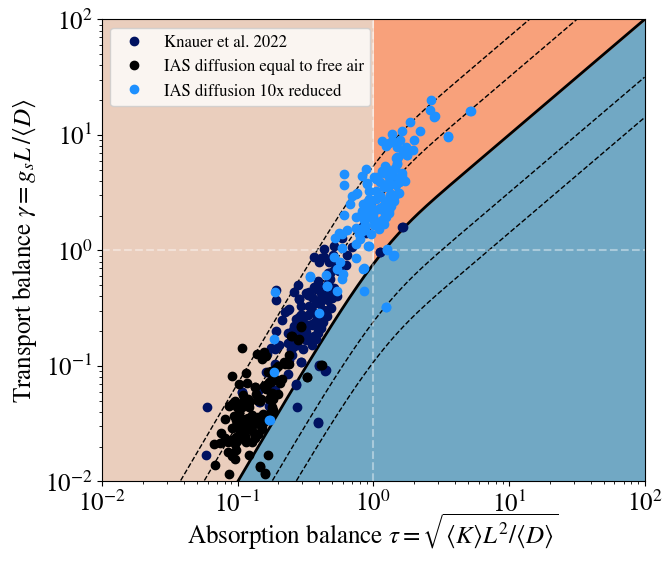

In [27]:
# load data for amphistomatous correction visualization
df = pd.read_csv('data/Knauer2022_all_hypostomatous.csv', sep=';', decimal=',')

fig, ax = plt.subplots(figsize=(7, 6))

# Plot 2D 
zeta_ = 0.1
xmin, xmax = 0.01, 100

taus = np.exp(np.linspace(np.log(xmin), np.log(xmax), 400))
borders = lambda taus, sigma: sigma*taus*np.tanh(taus)

# COLORS
# I : stomata
colorI = hex2rgb('71A8C4')      #hex2rgb('67a9b9')       #hex2rgb('00b9bd') #'teal' 
# II : absorption capacity
colorII = hex2rgb('EACEBD')      #hex2rgb('629076')      #hex2rgb('004853') #'darkgoldenrod'
# III : IAS
colorIII = hex2rgb('F8A17B')     #hex2rgb('dd7308')     #hex2rgb('f63700') #'seagreen'
#

# shading
ax.fill_between(taus, borders(taus, 1), xmin, color=colorI)
ax.fill_between(taus[taus <= 1], xmax, borders(taus[taus <= 1], 1), color=colorII)
ax.fill_between(taus[taus >= 1], xmax, borders(taus[taus >= 1], 1), color=colorIII)
# lines
ax.plot(taus, borders(taus, 1), color='black', linestyle='-', linewidth=2)
ax.plot(taus, borders(taus, np.sqrt(50)), color='black', linestyle='--', linewidth=1)
ax.plot(taus, borders(taus, np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax.plot(taus, borders(taus, 1/np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax.plot(taus, borders(taus, 1/np.sqrt(50)), color='black', linestyle='--', linewidth=1)
#
ax.set_xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 / \langle D \rangle}$', fontsize=18)
ax.set_ylabel(r'Transport balance $\gamma = g_s L \;/ \langle D \rangle$', fontsize=18)
ax.plot([1, 1], [xmin, xmax], color='white', linestyle='--', alpha=0.4)
ax.plot([xmin, xmax], [1, 1],  color='white', linestyle='--', alpha=0.4)
#ax1.plot([1, 1] ,[1.3, 100], color='forestgreen')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)

# plot original data points
tau0 = df['tau'].values
gamma0 = df['gamma'].values
ax.plot(tau0, gamma0, 'o', markersize=6, color=hex2rgb('001261'), label='Knauer et al. 2022')

def scale(taus, gammas, factors):
    return taus / np.sqrt(factors), gammas / factors

# plot the case where there is no reduction from regular air diffusion at all
factors = np.zeros_like(tau0)
for i in df.index.tolist():
    factors[i] = 1.57 / df.loc[i, 'fias_mesophyll'] # tortuosity adopted uniformly from Syvertsen et al 1995 (often in range 1.4-1.6)
ax.plot(*scale(tau0, gamma0, factors), 'o', markersize=6, color='black', label='IAS diffusion equal to free air')

# plot a factor 10 larger geometry factor
factors = 0.1*np.ones_like(tau0)
ax.plot(*scale(tau0, gamma0, factors), 'o', markersize=6, color='dodgerblue', label='IAS diffusion 10x reduced')
ax.legend(fontsize=12)
# alter tick mark size
ax.tick_params(axis='both', labelsize=18)
# alter axis label position
ax.xaxis.set_label_coords(0.5, -0.065)


plt.savefig('figs/S7_geometry_factor.jpg', dpi=900)

plt.show()
